In [56]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
import tensorflow as tf
from tensorflow import keras

In [58]:
from keras.api.preprocessing.image import load_img

# 8.2 TensorFlow and Keras

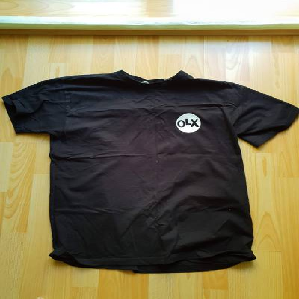

In [59]:
path = '../datasets/clothing-dataset-small-master/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))
img

In [60]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x2F28B0F20>


In [61]:
x = np.array(img)
x.shape

(299, 299, 3)

# 8.3 Pre-trained convolutional neural networks

In [62]:
from keras.api.applications.xception import Xception
from keras.api.applications.xception import preprocess_input
from keras.api.applications.xception import decode_predictions

In [63]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [64]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [65]:
X = preprocess_input(X)

In [66]:
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


array([[3.23712418e-04, 1.57383896e-04, 2.13493273e-04, 1.52370718e-04,
        2.47626274e-04, 3.05036112e-04, 3.20592255e-04, 1.47499362e-04,
        2.03621923e-04, 1.49272484e-04, 1.95663160e-04, 2.10137456e-04,
        7.59265240e-05, 1.13972361e-04, 1.62683602e-04, 2.04638694e-04,
        1.97416055e-04, 1.44288802e-04, 1.40217555e-04, 1.73686029e-04,
        7.46690959e-04, 2.56966741e-04, 2.66808958e-04, 2.96514627e-04,
        3.73602466e-04, 2.77404353e-04, 2.16571119e-04, 2.27270197e-04,
        3.80813290e-04, 1.72166023e-04, 3.05401278e-04, 1.96431400e-04,
        3.92115151e-04, 4.78071597e-04, 2.91751552e-04, 3.25693458e-04,
        1.47395302e-04, 1.62362136e-04, 2.12710642e-04, 1.34028436e-04,
        2.40070600e-04, 6.75212126e-04, 2.54943676e-04, 1.44478821e-04,
        4.12821304e-04, 2.04408730e-04, 3.02958302e-04, 1.49339685e-04,
        1.99653980e-04, 2.27006138e-04, 2.93729536e-04, 2.27444951e-04,
        6.37644669e-04, 7.82615738e-04, 2.49557401e-04, 4.052708

In [67]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196285),
  ('n02916936', 'bulletproof_vest', 0.03814003),
  ('n04370456', 'sweatshirt', 0.03432488),
  ('n03710637', 'maillot', 0.011354232),
  ('n04525038', 'velvet', 0.0018453632)]]

# 8.5 Transfer Learning

In [68]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [69]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [70]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [71]:
X, y = next(train_ds)

In [72]:
X.shape

(32, 150, 150, 3)

In [73]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [74]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/validation',
    target_size=(150, 150),
    batch_size=32
)

Found 341 images belonging to 10 classes.


In [75]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [76]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


In [77]:
preds

array([[-3.70408177e-01, -7.25026846e-01, -7.07290530e-01,
         1.69613194e+00,  5.61002374e-01,  1.46142006e-01,
         7.73822010e-01,  9.26099122e-01,  1.23726785e+00,
        -1.94736838e+00],
       [ 1.31853950e+00, -6.54989481e-01,  6.25129998e-01,
         4.57909107e-01,  3.71252000e-03,  1.30154097e+00,
        -5.66417694e-01, -1.20390832e+00,  1.02527905e+00,
         5.54447770e-01],
       [-1.17290831e+00,  2.03358173e-01, -1.44324154e-01,
         5.19987822e-01, -1.89248547e-01,  9.17605937e-01,
         1.67002037e-01, -2.07363069e-03,  9.32226717e-01,
        -2.31420100e-02],
       [ 6.01439953e-01, -3.12338024e-01, -5.00535488e-01,
         8.64424169e-01, -4.46488202e-01,  7.51160443e-01,
         6.68256581e-02,  5.59059501e-01,  5.76197028e-01,
        -5.02920628e-01],
       [ 8.68706584e-01, -1.27918780e-01, -4.83855456e-01,
         5.34575880e-01, -2.64178187e-01,  1.22471964e+00,
         8.89628053e-01, -1.16038454e+00,  5.06368756e-01,
         1.

In [78]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [79]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/Users/roman_didyk/.local/share/virtualenvs/rd-ml-zoomcamp-2024_08-deep-learning-tDWc_-pz/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - accuracy: 0.5887 - loss: 1.6485 - val_accuracy: 0.7595 - val_loss: 0.9541
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 406ms/step - accuracy: 0.8180 - loss: 0.5941 - val_accuracy: 0.7683 - val_loss: 0.9943
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 417ms/step - accuracy: 0.8649 - loss: 0.4506 - val_accuracy: 0.7713 - val_loss: 1.0280
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 432ms/step - accuracy: 0.9297 - loss: 0.2146 - val_accuracy: 0.7918 - val_loss: 0.8856
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 482ms/step - accuracy: 0.9427 - loss: 0.1570 - val_accuracy: 0.8211 - val_loss: 0.8265
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 476ms/step - accuracy: 0.9611 - loss: 0.1139 - val_accuracy: 0.7801 - val_loss: 0.9382
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 486ms/step - accuracy: 0.9833 - loss: 0.0582 - val_accuracy: 0.8065 - val_loss: 0.8788
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 483ms/step - accuracy: 0.9905 - loss: 0.0405 - val_accuracy: 0.824

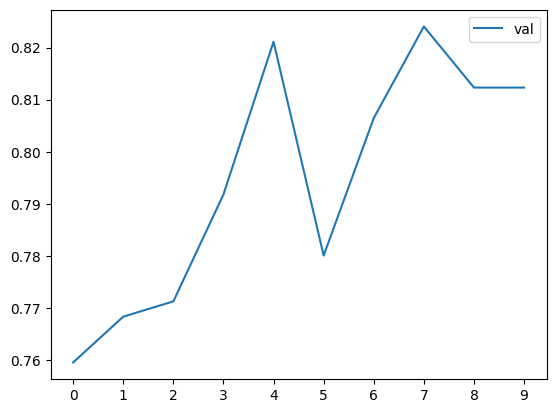

In [80]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# 8.6 Adjusting the learning rate

In [81]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [82]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 0.2059 - loss: 2.2127 - val_accuracy: 0.5073 - val_loss: 1.6538
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 477ms/step - accuracy: 0.5502 - loss: 1.4717 - val_accuracy: 0.6129 - val_loss: 1.2912
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 444ms/step - accuracy: 0.6250 - loss: 1.1853 - val_accuracy: 0.6628 - val_loss: 1.1099
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 432ms/step - accuracy: 0.6706 - loss: 1.0309 - val_accuracy: 0.6921 - val_loss: 1.0009
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 437ms/step - accuracy: 0.6888 - loss: 0.9315 - val_accuracy: 0.7126 - val_loss: 0.9250
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 412ms/step - accuracy: 0.7415 - loss: 0.8328 - val_accuracy: 0.7302 - val_loss: 0.8739
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 408ms/step - accuracy: 0.7489 - loss: 0.7872 - val_accuracy: 0.7361 - val_loss: 0.8315
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 387ms/step - accuracy: 0.7688 - loss: 0.7317 - v

In [83]:
del scores[0.1]
del scores[0.0001]

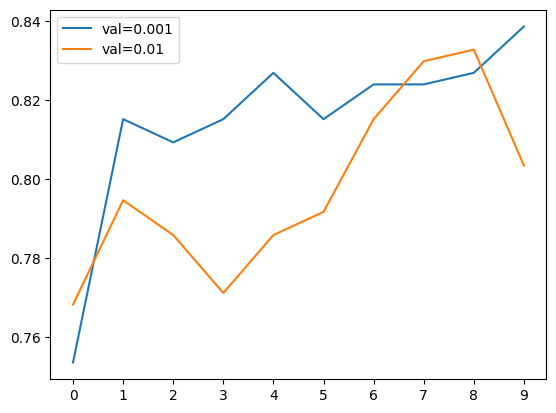

In [84]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [85]:
learning_rate = 0.001

# 8.7 Checkpointing

In [86]:
# model.save_weights('model_v1.keras')

In [87]:
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',  # Dynamic filename
    save_best_only=True,  # Save only the best-performing model
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Save when validation accuracy is maximized
    verbose=1  # Print messages when saving
)

In [88]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.5059 - loss: 1.4598
Epoch 1: val_accuracy improved from -inf to 0.77713, saving model to xception_v1_01_0.777.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 507ms/step - accuracy: 0.5070 - loss: 1.4562 - val_accuracy: 0.7771 - val_loss: 0.7178
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.7707 - loss: 0.6845
Epoch 2: val_accuracy improved from 0.77713 to 0.80059, saving model to xception_v1_02_0.801.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 499ms/step - accuracy: 0.7708 - loss: 0.6841 - val_accuracy: 0.8006 - val_loss: 0.6262
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.8378 - loss: 0.4983
Epoch 3: val_accuracy improved from 0.80059 to 0.80645, saving model to xception_v1_03_0.806.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 509ms/step - accuracy: 0.8377 - loss: 0.4985 - val_accuracy: 0.8065 - val_loss: 0.5799
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.8647 - loss: 0.4438
Epoch 4:

# 8.8 Adding more layers

In [89]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [90]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 409ms/step - accuracy: 0.4138 - loss: 1.8135 - val_accuracy: 0.6540 - val_loss: 1.1493
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 395ms/step - accuracy: 0.6673 - loss: 1.0301 - val_accuracy: 0.6979 - val_loss: 0.9087
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 405ms/step - accuracy: 0.7428 - loss: 0.7802 - val_accuracy: 0.7449 - val_loss: 0.7988
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 405ms/step - accuracy: 0.7955 - loss: 0.6351 - val_accuracy: 0.7566 - val_loss: 0.7340
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 0.8270 - loss: 0.5401 - val_accuracy: 0.7566 - val_loss: 0.7410
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 352ms/step - accuracy: 0.8476 - loss: 0.4653 - val_accuracy: 0.7742 - val_loss: 0.6522
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 352ms/step - accuracy: 0.8647 - loss: 0.4243 - val_accuracy: 0.7947 - val_loss: 0.6285
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 353ms/step - accuracy: 0.8932 - loss: 0.3634 - val_a

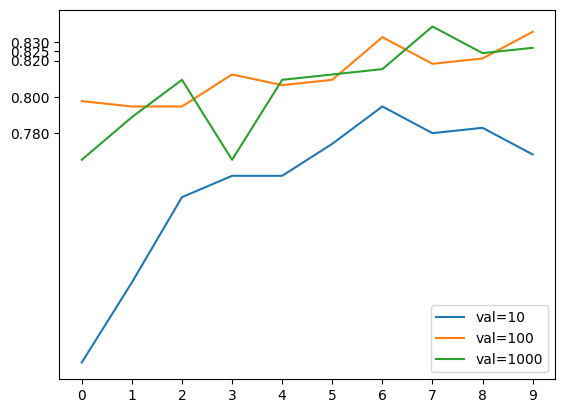

In [94]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

# 8.9 Regularization and dropout

In [95]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [96]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 394ms/step - accuracy: 0.5651 - loss: 1.3188 - val_accuracy: 0.7771 - val_loss: 0.6356
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 377ms/step - accuracy: 0.8176 - loss: 0.5173 - val_accuracy: 0.8065 - val_loss: 0.5917
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 369ms/step - accuracy: 0.8854 - loss: 0.3627 - val_accuracy: 0.8240 - val_loss: 0.5574
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 392ms/step - accuracy: 0.9339 - loss: 0.2287 - val_accuracy: 0.8152 - val_loss: 0.5286
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 377ms/step - accuracy: 0.9487 - loss: 0.1861 - val_accuracy: 0.8006 - val_loss: 0.5604
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 379ms/step - accuracy: 0.9666 - loss: 0.1415 - val_accuracy: 0.8299 - val_loss: 0.5732
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.9859 - loss: 0.0823 - val_accuracy: 0.8006 - val_loss: 0.6350
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 381ms/step - accuracy: 0.9927 - loss: 0.0586 - val_

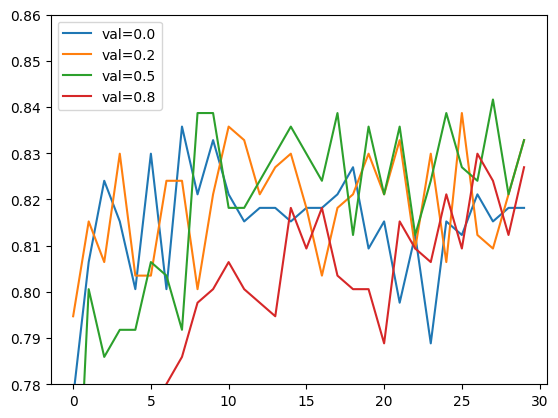

In [97]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

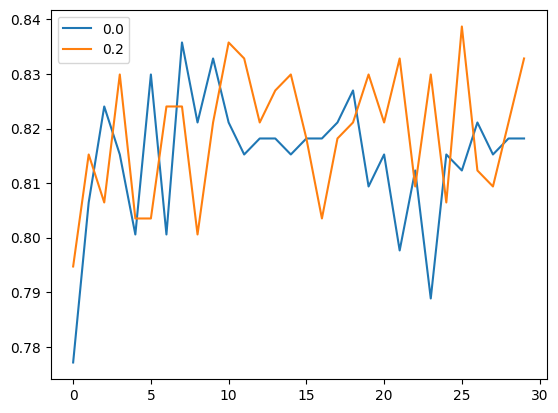

In [98]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

# 8.10 Data augmentation

In [100]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [101]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 494ms/step - accuracy: 0.5575 - loss: 1.3038 - val_accuracy: 0.7771 - val_loss: 0.6641
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 490ms/step - accuracy: 0.7902 - loss: 0.5970 - val_accuracy: 0.8182 - val_loss: 0.5574
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 477ms/step - accuracy: 0.8505 - loss: 0.4542 - val_accuracy: 0.8094 - val_loss: 0.5586
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 486ms/step - accuracy: 0.8781 - loss: 0.3513 - val_accuracy: 0.8299 - val_loss: 0.5262
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 45s 464ms/step - accuracy: 0.9211 - loss: 0.2495 - val_accuracy: 0.8123 - val_loss: 0.5230
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 45s 467ms/step - accuracy: 0.9438 - loss: 0.2161 - val_accuracy: 0.8211 - val_loss: 0.5559
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 486ms/step - accuracy: 0.9555 - loss: 0.1597 - val_accuracy: 0.8211 - val_loss: 0.5564
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 507ms/step - accuracy: 0.9634 - loss: 0.1411 - val_accu

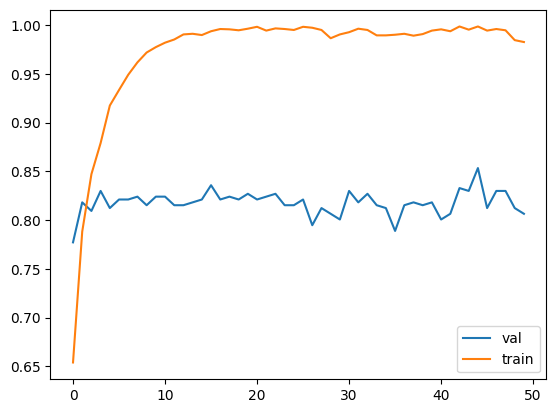

In [102]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# 8.11 Training a larger model

In [103]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [104]:
input_size = 299

In [105]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [107]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [110]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.5257 - loss: 1.4392 - val_accuracy: 0.8387 - val_loss: 0.5597
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8184 - loss: 0.5481 - val_accuracy: 0.8739 - val_loss: 0.4419
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8379 - loss: 0.4716 - val_accuracy: 0.8592 - val_loss: 0.4273
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8651 - loss: 0.3938 - val_accuracy: 0.8739 - val_loss: 0.3779
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8797 - loss: 0.3450 - val_accuracy: 0.8798 - val_loss: 0.3866
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8883 - loss: 0.3218 - val_accuracy: 0.8592 - val_loss: 0.4079
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8916 - loss: 0.3029 - val_accuracy: 0.8504 - val_loss: 0.3940
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9020 - loss: 0.2886 - val_accuracy: 0.8944 - v

# 8.12 Using the model

In [113]:
import tensorflow as tf
from tensorflow import keras

In [114]:

from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.api.preprocessing.image import load_img

from keras.api.applications.xception import preprocess_input

# from keras.src.utils import image_dataset_from_directory
# from keras.src.utils import load_img

# from keras.src.applications.xception import preprocess_input

In [115]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [117]:
model = keras.models.load_model('xception_v4_1_12_0.897.keras')

In [118]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8872 - loss: 0.2862


[0.25019776821136475, 0.9032257795333862]

In [119]:
path = '../datasets/clothing-dataset-small-master/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

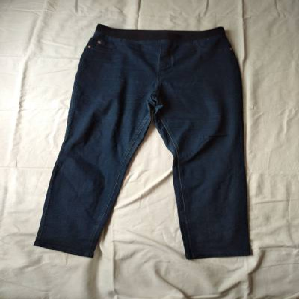

In [126]:
img = load_img(path, target_size=(299, 299))
img

In [127]:
import numpy as np

In [128]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [129]:
X = preprocess_input(X)
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[-1.9370984 , -6.803692  ,  0.05219149, -1.0463845 ,  9.928428  ,
        -0.691413  , -5.709043  ,  3.814641  , -3.5868914 , -2.7132945 ]],
      dtype=float32)

In [130]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [131]:
dict(zip(classes, pred[0]))

{'dress': -1.9370984,
 'hat': -6.803692,
 'longsleeve': 0.05219149,
 'outwear': -1.0463845,
 'pants': 9.928428,
 'shirt': -0.691413,
 'shoes': -5.709043,
 'shorts': 3.814641,
 'skirt': -3.5868914,
 't-shirt': -2.7132945}